## Imports for the Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import stats

# Reading in the Data

In [2]:
# DataFrame for Crime Data Between 1996-2007
df1 = pd.read_csv('seattle_data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
# DataFrame for Crime Data from 2008-Present
df2 = pd.read_csv('seattle_data/seattle-crime-stats-by-police-precinct-2008-present.csv')

#### What kinds of information does each set of years tell us?
To do this, let's take a look through some of the rows in the DataFrames.

In [3]:
df1.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [4]:
df2.loc[3:20]

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368
5,S3,Burglary,Burglary,11,2014-04-30T00:00:00.000,S,SE,27237
6,G3,Assault,Assault,1,2014-04-30T00:00:00.000,G,E,26422
7,R3,Homicide,Homicide,0,2014-04-30T00:00:00.000,R,SE,27119
8,O1,Rape,Rape,1,2014-04-30T00:00:00.000,O,SE,26588
9,W3,Burglary,Burglary,6,2014-04-30T00:00:00.000,W,SW,27349
10,D2,Burglary,Burglary,14,2014-04-30T00:00:00.000,D,W,26257
11,S2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",10,2014-04-30T00:00:00.000,S,SE,27208
12,L1,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",10,2014-04-30T00:00:00.000,L,N,26704


In [5]:
df2.loc[21:41]

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
21,K2,Robbery,Robbery,7,2014-04-30T00:00:00.000,K,W,26505
22,F1,Larceny-Theft,Larceny-Theft,18,2014-04-30T00:00:00.000,F,SW,27319
23,F1,Homicide,Homicide,0,2014-04-30T00:00:00.000,F,SW,27315
24,L1,Burglary,Burglary,9,2014-04-30T00:00:00.000,L,N,26705
25,F3,Assault,Assault,3,2014-04-30T00:00:00.000,F,SW,27374
26,N2,Assault,Assault,5,2014-04-30T00:00:00.000,N,N,26814
27,Q1,Burglary,Burglary,11,2014-04-30T00:00:00.000,Q,W,27433
28,K1,Homicide,Homicide,0,2014-04-30T00:00:00.000,K,W,26447
29,K1,Larceny-Theft,Larceny-Theft,67,2014-04-30T00:00:00.000,K,W,26451
30,G2,Robbery,Robbery,2,2014-04-30T00:00:00.000,G,E,26561


# Purpose of the Analysis

The goal of this exploratory data analysis is to understand trends in crime for the City of Seattle over roughly the past 24 years. The outcome of asking and seeking this answers about this data will hopefully help lead us to make suggestions for how urban communities in Seattle and elsewhere can improve.

## Question 1: How has the amount of crime in Seattle changed over the years 1996-Present?

In [6]:
def count_annual_crimes(df):
    """Return a dict of all the years in a DataFrame, with the total number of crimes that occured in that year."""
    # figure out which df we have, and which years we have data for in the df
    if 'Report_Year' in df.columns:
        years = df['Report_Year'].unique()
    else:
        reported_years = pd.Series([int(date[:4]) for date in df['REPORT_DATE']])
        years = sorted(reported_years.unique())
    # iterate over rows of dataset, and count up the total crimes in each year
    year_crimes = dict()
    # separate algorithms for one df over the other
    
    # condition for 1996-2007
    if 'Report_Year' in df.columns:
        for index, year in enumerate(years):
            # grab all the rows with this year, and sum crime numbers
            crimes_ls = (df.loc[df['Report_Year'] == year])['Report_Year_Total'].dropna()
            # print(crimes_ls)
            crimes = sum([int(crime) for crime in crimes_ls])
            year_crimes[year] = crimes
    # condition for 2008-present
    else:
        for year in years:
            crimes = len([date for date in df['REPORT_DATE'].dropna().values if str(year) in date])
            year_crimes[year] = crimes
    return year_crimes


annual_crimes_1996 = count_annual_crimes(df1)
annual_crimes_2008 = count_annual_crimes(df2)
# combine the two dictionaries
annual_crime_counts = annual_crimes_1996.copy()
annual_crime_counts.update(annual_crimes_2008)

Line Graph Representation

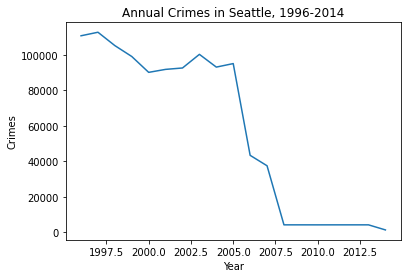

In [7]:
years, annual_crimes = (
    list(annual_crime_counts.keys()),
    list(annual_crime_counts.values())
)
plt.title("Annual Crimes in Seattle, 1996-2014")
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.plot(years, annual_crimes)
plt.show()

## Question 2: What Kinds of Crime Were Most Prevalent over 1996-2007? 2008-2014?

In [8]:
def make_pie_chart(x, labels, title):
    """Creates a pie chart to represent the data, x.
       Depends on Matplotlib.
    
       Parameters:
       x(list of numbers): data to plot
       labels(list of str): must be same length as x,
                            and index position of each str corresponds
                            with whichever group in x that it labels
       title(str): descriptive name for the plot as a whole
       
       Returns: None
       
    """
    plt.pie(x, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

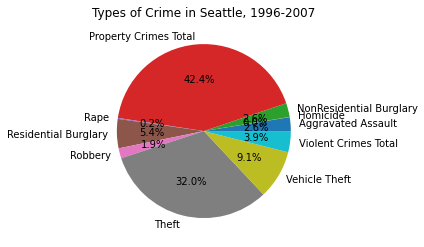

In [9]:
# Store variables for column names
ct, reported = 'Crime_Type', 'Report_Year_Total'
# For each DataFrame, we can determine all the different crime types
crime_types_96 = df1[ct].unique()

# For 2008-2014, count amounts of different crime types
crime_counts_by_type = list()
for crime in crime_types_96:
    counts = df1.loc[df1[ct] == crime, [reported]].values
    counts = counts.reshape(1, -1)[0]
    crime_count = sum(counts)
    crime_counts_by_type.append(crime_count)
    
# Pie Chart Representation
make_pie_chart(crime_counts_by_type, crime_types_96,
                "Types of Crime in Seattle, 1996-2007")

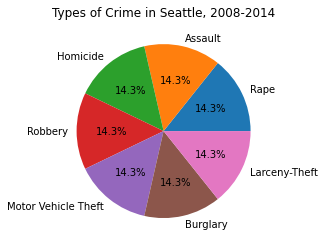

In [10]:
# Find the Crime Types for 2008-2014
crime_types_08 = df2[ct.upper()].unique()

# Create a Pie Chart for the different crime types
crime_counts_by_type = list()
for crime in crime_types_08:
    crime_count = df2[ct.upper()].value_counts()[crime]
    crime_counts_by_type.append(crime_count)
    
# Pie Chart Representation
make_pie_chart(crime_counts_by_type, crime_types_08,
                "Types of Crime in Seattle, 2008-2014")

Interesting! So it looks like all the crimes levelled off in Seattle to equivalent amounts. But will this equality also hold out for different regions of the city.

## Question 3: Which precincts of the city saw the most crime in Seattle, from 2008-2014?

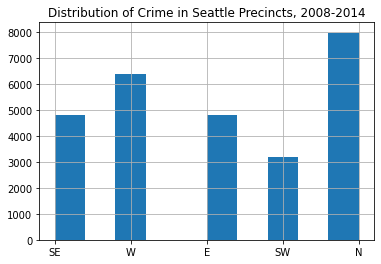

In [11]:
df2['Precinct'].hist()
plt.title("Distribution of Crime in Seattle Precincts, 2008-2014")
plt.show()

Okay, so the police may need to focus on some areas more than others. How should they best prepare for the criminals in each precinct of Seattle?

## Question 4: Which Crime Type Was the Most Common, for each Precinct between the years 2008-2014?

In [30]:
# store each precinct with its most common crime type
precincts_most_common = dict()
# iterate over the city precincts
precincts = df2['Precinct'].unique()
for precinct in precincts:
    # find the most common
    crimes_in_precinct = df2[df2['Precinct'] == precinct]['CRIME_TYPE'].value_counts()
    precincts_most_common[precinct] = crimes_in_precinct
    
    
# Print the results!
# print(precincts_most_common.items())
print('For the years 2008-2014:\n')
for p in precincts:
    conclusion = precincts_most_common[p]
    print(f'Here is the breakdown of crime types in precinct {p}: \n{conclusion}.\n')

For the years 2008-2014:

Here is the breakdown of crime types in precinct SE: 
Motor Vehicle Theft    684
Rape                   684
Assault                684
Robbery                684
Burglary               684
Larceny-Theft          684
Homicide               684
Name: CRIME_TYPE, dtype: int64.

Here is the breakdown of crime types in precinct W: 
Assault                913
Robbery                913
Burglary               912
Motor Vehicle Theft    912
Rape                   912
Larceny-Theft          911
Homicide               911
Name: CRIME_TYPE, dtype: int64.

Here is the breakdown of crime types in precinct E: 
Motor Vehicle Theft    684
Rape                   684
Assault                684
Robbery                684
Burglary               684
Larceny-Theft          684
Homicide               684
Name: CRIME_TYPE, dtype: int64.

Here is the breakdown of crime types in precinct SW: 
Motor Vehicle Theft    456
Rape                   456
Assault                456
Robbery      

Astounding! According to the printouts, the different crimes occurred the same amount, within a given precinct.

# Final Conclusions

1. Fortunately from the City of Seattle has seen a decrease in annual crimes from 1996-2014, by orders of magnitude.
2. In the 6 years between 2008-2014, crime in Seattle achieved a much more equal distribution than in the decade prior, from 1996-2007.
3. In the years 2008-2014, the "N" precinct of Seattle saw much more crime than the others.
4. In each precinct of the city, the different crimes occurred the same amount within that  given precinct. This suggests that the police should be equally equipped for handling all the major crime types (although as we saw earlier, they may have to pay more attention to some precincts more than others).